In [1]:
import os
import pandas as pd
import pandas_gbq
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.cloud import bigquery
%load_ext google.cloud.bigquery

pandas_gbq.context.project = 'bigquery-public-data'
pandas_gbq.context.dialect = 'standard'

In [4]:
def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

In [5]:
%%bigquery liquor_sales
SELECT *
FROM `bigquery-public-data.iowa_liquor_sales.sales`

Downloading: 100%|████████████████████████████████████████████████████| 20349538/20349538 [33:39<00:00, 10074.37rows/s]


In [6]:
liquor_sales

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S12973900400,2013-06-25,4875,Bani's,"307, MAIN ST",CEDAR FALLS,50613,POINT (-92.445477 42.535592),07,Black Hawk,...,42699,Malibu Mango Rum,12,750,7.50,11.24,3,33.72,2.25,0.59
1,S31391200029,2016-03-22,2665,Hy-Vee / Waukee,1005 E HICKMAN RD,WAUKEE,50263,POINT (-93.854477 41.615059),25,Dallas,...,43076,Admiral Nelson Coconut Rum,12,750,5.78,8.67,3,26.01,2.25,0.59
2,S23579700015,2015-01-20,3808,Thriftway,300 4TH ST,LA PORTE CITY,50651,POINT (-92.190813 42.316243),07,Black Hawk,...,42716,Malibu Coconut Rum,12,750,7.49,11.24,3,33.72,2.25,0.59
3,S11589000084,2013-04-11,2548,Hy-Vee Food Store / Altoona,100 8TH STREET SW,ALTOONA,50009,POINT (-93.465301 41.644041),77,Polk,...,42714,Malibu Coconut Rum,24,375,4.00,5.99,6,35.94,2.25,0.59
4,S07531700056,2012-09-04,2959,Dahl's / Merle Hay,4343 MERLE HAY ROAD,DES MOINES,50310,POINT (-93.697647 41.63740800000001),77,Polk,...,43410,Captain Morgan Parrot Bay Coconut,12,750,7.49,11.23,3,33.69,2.25,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20349533,INV-14973800178,2018-10-10,2625,Hy-Vee Wine & Spirits #2 / Davenport,3301 W Kimberly Rd,Davenport,52804,None,82,SCOTT,...,44657,Lady Bligh Spiced Rum,12,1000,7.25,10.88,6,65.28,6.00,1.58
20349534,INV-15108600083,2018-10-17,2611,Hy-Vee Drugstore / Ottumwa,1140 North Jefferson St,Ottumwa,52501,POINT (-92.401538 41.026754000000004),90,WAPELLO,...,43338,Captain Morgan Spiced Rum,6,1750,18.00,27.00,24,648.00,42.00,11.09
20349535,INV-20233500035,2019-06-26,2629,Hy-Vee Food Store #2 / Council Bluffs,1745 Madison Ave,Council Bluffs,51503,POINT (-95.825137 41.242732),78,POTTAWATTA,...,42984,Trader Vics Private Selection Spiced Rum,6,1750,10.00,15.00,120,1800.00,210.00,55.47
20349536,INV-23193100039,2019-11-12,5685,Fareway Stores #190 / Cedar Falls,4500 S Main St,Cedar Falls,50613,POINT (-92.445875 42.497359),7,BLACK HAWK,...,43334,Captain Morgan Original Spiced,24,375,5.00,7.50,3,22.50,1.12,0.29


In [7]:
liquor_sales.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [8]:
#checking for the null values
liquor_sales.isnull().sum()

invoice_and_item_number          0
date                             0
store_number                     0
store_name                       0
address                      79927
city                         79926
zip_code                     79971
store_location             1951877
county_number               156731
county                      156729
category                     16974
category_name                25040
vendor_number                    5
vendor_name                      3
item_number                      0
item_description                 0
pack                             0
bottle_volume_ml                 0
state_bottle_cost               10
state_bottle_retail             10
bottles_sold                     0
sale_dollars                    10
volume_sold_liters               0
volume_sold_gallons              0
dtype: int64

<AxesSubplot:>

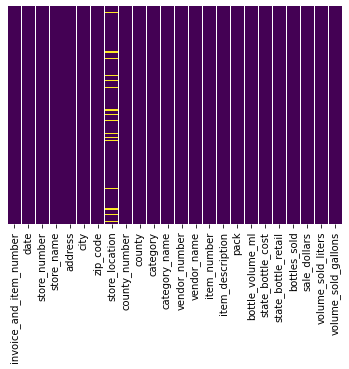

In [26]:
#which columns have null values 
sns.heatmap(liquor_sales.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [9]:
#check is there duplicates
liquor_sales.duplicated().sum()

0

In [36]:
#check columns type
liquor_sales.dtypes

invoice_and_item_number            object
date                       datetime64[ns]
store_number                       object
store_name                         object
address                            object
city                               object
zip_code                           object
store_location                     object
county_number                      object
county                             object
category                           object
category_name                      object
vendor_number                      object
vendor_name                        object
item_number                        object
item_description                   object
pack                                int64
bottle_volume_ml                    int64
state_bottle_cost                 float64
state_bottle_retail               float64
bottles_sold                        int64
sale_dollars                      float64
volume_sold_liters                float64
volume_sold_gallons               

In [11]:
liquor_sales['date'] = pd.to_datetime(liquor_sales['date'])
liquor_sales['Year'] = liquor_sales['date'].dt.year
liquor_sales['Month'] = liquor_sales['date'].dt.month
liquor_sales['Day'] = liquor_sales['date'].dt.day

In [12]:
#what is the first and last date in our dataset
print(liquor_sales['date'].min())
print(liquor_sales['date'].max())

2012-01-03 00:00:00
2020-12-31 00:00:00


In [13]:
#unique values in each column
liquor_sales.nunique()

invoice_and_item_number    20349538
date                           2202
store_number                   2521
store_name                     2674
address                        3746
city                            838
zip_code                        491
store_location                 2010
county_number                   108
county                          201
category                        110
category_name                   133
vendor_number                   366
vendor_name                     497
item_number                    9905
item_description               8917
pack                             27
bottle_volume_ml                 56
state_bottle_cost              3086
state_bottle_retail            3555
bottles_sold                    594
sale_dollars                  28727
volume_sold_liters             1355
volume_sold_gallons            1604
Year                              9
Month                            12
Day                              31
dtype: int64

In [23]:
liquor_sales.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,2.034954e+07,2.034954e+07,2.034953e+07,2.034953e+07,2.034954e+07,2.034953e+07,2.034954e+07,2.034954e+07
mean,1.226953e+01,9.088706e+02,9.975387e+00,1.497736e+01,1.036248e+01,1.357428e+02,9.135992e+00,2.411980e+00
std,7.677191e+00,6.604272e+02,1.071644e+01,1.607437e+01,2.808601e+01,4.697202e+02,3.381414e+01,8.932809e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,7.500000e+02,5.500000e+00,8.250000e+00,3.000000e+00,3.150000e+01,1.500000e+00,4.000000e-01
50%,1.200000e+01,7.500000e+02,8.250000e+00,1.237000e+01,6.000000e+00,7.200000e+01,5.000000e+00,1.320000e+00
75%,1.200000e+01,1.000000e+03,1.207000e+01,1.812000e+01,1.200000e+01,1.404000e+02,1.050000e+01,2.770000e+00
max,3.360000e+02,3.780000e+05,7.680000e+03,1.152000e+04,1.500000e+04,2.795573e+05,1.500000e+04,3.962580e+03


In [27]:
liquor_sales[['state_bottle_cost', 'state_bottle_retail']].describe()


,state_bottle_cost,state_bottle_retail
count,2.034953e+07,2.034953e+07
mean,9.975387e+00,1.497736e+01
std,1.071644e+01,1.607437e+01
min,0.000000e+00,0.000000e+00
25%,5.500000e+00,8.250000e+00
50%,8.250000e+00,1.237000e+01
75%,1.207000e+01,1.812000e+01
max,7.680000e+03,1.152000e+04


In [23]:
sales_category_month = liquor_sales.groupby(['category_name','Year','Month']).sum()[['bottles_sold','bottle_volume_ml','sale_dollars']]
sales_category_month.reset_index(inplace=True)
sales_category_month

,category_name,Year,Month,bottles_sold,bottle_volume_ml,sale_dollars
0,100 PROOF VODKA,2012,1,12326,1889500,104432.75
1,100 PROOF VODKA,2012,2,12338,1966750,103329.44
2,100 PROOF VODKA,2012,3,13590,1919250,117455.72
3,100 PROOF VODKA,2012,4,12733,1911250,107221.09
4,100 PROOF VODKA,2012,5,15445,2284625,129834.22
...,...,...,...,...,...,...
6516,White Rum,2020,8,48904,5071900,564740.64
6517,White Rum,2020,9,44338,4920675,523750.04
6518,White Rum,2020,10,49394,4681900,596545.81
6519,White Rum,2020,11,43668,4668000,526125.84


In [68]:
sales_category_month.nlargest(30,['bottles_sold','sale_dollars'])

,category_name,Year,Month,bottles_sold,bottle_volume_ml,sale_dollars
1249,American Vodkas,2020,9,554353,31491675,5.869789e+06
1246,American Vodkas,2020,6,543275,34028775,5.437429e+06
1236,American Vodkas,2019,8,541972,31214475,5.192771e+06
1248,American Vodkas,2020,8,532233,31043000,5.642220e+06
1224,American Vodkas,2018,8,530865,34701575,4.784180e+06
1233,American Vodkas,2019,5,522945,33685375,5.002704e+06
1235,American Vodkas,2019,7,521000,33779750,4.888023e+06
1238,American Vodkas,2019,10,510013,29629700,4.540739e+06
1243,American Vodkas,2020,3,506344,32148050,4.615669e+06
1252,American Vodkas,2020,12,505454,33710350,4.737585e+06


In [27]:
#the most popular category in 2020 is American Vodkas
sales_category_month.loc[sales_category_month['Year'] == 2020].nlargest(10,['bottles_sold','sale_dollars'])

,category_name,Year,Month,bottles_sold,bottle_volume_ml,sale_dollars
1249,American Vodkas,2020,9,554353,31491675,5.869789e+06
1246,American Vodkas,2020,6,543275,34028775,5.437429e+06
1248,American Vodkas,2020,8,532233,31043000,5.642220e+06
1243,American Vodkas,2020,3,506344,32148050,4.615669e+06
1252,American Vodkas,2020,12,505454,33710350,4.737585e+06
1250,American Vodkas,2020,10,500899,30677175,4.953810e+06
1247,American Vodkas,2020,7,498637,32609000,4.882778e+06
1245,American Vodkas,2020,5,487707,31911500,4.944979e+06
1244,American Vodkas,2020,4,481342,31941100,4.733477e+06
1251,American Vodkas,2020,11,459313,30380225,4.475157e+06


In [28]:
#10 the most unpopular items in 2020
sales_category_month.loc[sales_category_month['Year'] == 2020].nsmallest(10, ['bottles_sold','sale_dollars'])


,category_name,Year,Month,bottles_sold,bottle_volume_ml,sale_dollars
5913,Temporary & Specialty Packages,2020,12,1,1750,13.11
940,American Distilled Spirits Specialty,2020,3,6,750,243.00
941,American Distilled Spirits Specialty,2020,5,6,750,243.00
942,American Distilled Spirits Specialty,2020,6,6,750,243.00
3494,Imported Distilled Spirits Specialty,2020,1,6,750,245.28
946,American Distilled Spirits Specialty,2020,12,6,750,270.00
3496,Imported Distilled Spirits Specialty,2020,5,6,750,281.82
1196,American Vodka,2020,8,11,800,100.50
5911,Temporary & Specialty Packages,2020,10,12,3500,157.32
2062,Cocktails / RTD,2020,6,12,1000,207.00


In [45]:
import plotly.express as px

plot_year = sales_category_month.fillna('NA').groupby(['Year','category_name'])['sale_dollars'].sum().groupby(
            ['Year','category_name']).max().sort_values().groupby(
            ['Year']).sum().sort_values(ascending=False)
year = pd.DataFrame(plot_year.head(20))

fig_reg = px.bar(year,x=year.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per Year",
    xaxis_title=" Year",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

In [41]:
import plotly.graph_objects as go

plot_category = sales_category_month.fillna('NA').groupby(['category_name'])['sale_dollars'].sum().sort_values(ascending=False)
top_category = pd.DataFrame(plot_category.head(10))

fig_reg = px.bar(top_category,x=top_category.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Top 10 sales of liquor per category",
    xaxis_title="Category Name",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

In [47]:
plot_category = sales_category_month.fillna('NA').groupby(['category_name'])['sale_dollars'].sum().sort_values(ascending=True)
top_category = pd.DataFrame(plot_category.head(10))

fig_reg = px.bar(top_category,x=top_category.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Worth 10 sales of liquor per category",
    xaxis_title="Category Name",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

In [64]:
month_plot = sales_category_month.fillna('NA').groupby(['Month'])['sale_dollars'].sum().sort_values(ascending=False)

fig_reg = px.bar(month_plot,x=month_plot.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per Month",
    xaxis_title="Month Number",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()


# Conclusion

As we can see above, the top 3 most popular items are:
American Vodkas, Canadian Whiskies, Vodka 80 Proof

Also, the most popular item has remained that way over the years.

Regarding the most unpopular goods, we can observe that most likely the business will not lose anything by ceasing to buy them.

Also, based on the constructed graphs by months, it can be assumed that the increase in sales is associated with national holidays